In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from IPython.core.display import display, HTML

# pd.set_option('float_format', '{:.2f}'.format)
import math

def amount_group ():
    if x['amount'] <= 20000: 
        return 20000
    elif x['amount'] <= 50000 and x['amount'] > 20000:
        return 50000
    elif x['amount'] < len(level_3):
        return 'Level 3 unfinished'
    else:
        'All level finished'

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
pd.options.display.float_format = '{:,.2f}'.format

#  <font color='red'>PART 1: Loading and cleaning data set</font>

In [2]:
## load the data set
data = pd.read_excel(r'Loyalty BI test case  - 20201223.xlsx', sheet_name='Promotion Details')

In [3]:
## review the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24780 entries, 0 to 24779
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transID                24780 non-null  int64         
 1   Promotion Name         24780 non-null  object        
 2   userID                 24780 non-null  int64         
 3   amount                 24780 non-null  int64         
 4   userCharge             24780 non-null  int64         
 5   new Map                24780 non-null  int64         
 6   new Pay                24780 non-null  int64         
 7   appID                  24780 non-null  int64         
 8   telco                  24780 non-null  object        
 9   Thời gian giao dịch    24780 non-null  datetime64[ns]
 10  Mã Voucher đã sử dụng  24780 non-null  object        
 11  Giá trị khuyến mãi     24780 non-null  int64         
 12  Unnamed: 12            0 non-null      float64       
dtypes

In [4]:
data['telco'].unique().tolist()

['Viettel',
 'MobiFone',
 'Mobifone',
 'VinaPhone',
 'Vinaphone',
 'Vietnamobile',
 'GMobile',
 'Gmobile']

#### The value of telco is dupplicated so that we need to clean it before analysing it

In [4]:
data['telco'] = data['telco'].str.upper() 
data['telco'].unique().tolist()

['VIETTEL', 'MOBIFONE', 'VINAPHONE', 'VIETNAMOBILE', 'GMOBILE']

#### The data set have total 12 variable. 
I add one more column TIME_HOUR to get information about the hour that transaction were made 


In [6]:
data['TIME_HOUR'] = data['Thời gian giao dịch'].dt.hour


In [7]:
## descriptive statistic
data.describe()

,transID,userID,amount,userCharge,new Map,new Pay,appID,Giá trị khuyến mãi,Unnamed: 12,TIME_HOUR
count,"24,780.00","24,780.00","24,780.00","24,780.00","24,780.00","24,780.00","24,780.00","24,780.00",0.00,"24,780.00"
mean,"200,836,146,937,965.38","193,574,419,485,689.34","46,406.90","37,262.87",0.03,0.17,25.18,"9,144.71",NaN,13.94
std,"45,365,452,414.16","8,279,561,362,724.15","54,310.19","54,278.70",0.16,0.38,21.73,"1,253.38",NaN,5.38
min,"200,729,000,103,377.00","160,822,000,000,039.00","18,500.00","9,500.00",0.00,0.00,12.00,"9,000.00",NaN,0.00
25%,"200,812,000,137,345.50","190,222,000,014,379.00","19,300.00","10,300.00",0.00,0.00,12.00,"9,000.00",NaN,10.00
50%,"200,820,000,339,070.00","200,115,000,026,871.00","19,300.00","10,300.00",0.00,0.00,12.00,"9,000.00",NaN,14.00
75%,"200,831,000,246,195.50","200,509,000,023,152.00","48,250.00","39,250.00",0.00,0.00,61.00,"9,000.00",NaN,19.00
max,"200,924,000,128,561.00","200,818,000,050,554.00","965,000.00","956,000.00",1.00,1.00,61.00,"20,000.00",NaN,23.00


In [8]:
## unique userid in data set
len(data['userID'].unique())

15339

In [9]:
## number of amount 
print("The unique value of the Amount variable", len(data['amount'].unique()))
print("The min value:", data['amount'].min())
print("The max value:", data['amount'].max())

The unique value of the Amount variable 65
The min value: 18500
The max value: 965000


### OVERVIEW about the dataset
There are **24,780 transactions** in this data set by **15,339 users**.

The value of the **AMOUNT**
    - The maximum value is 965,000 and the minimum amount is 18,500
    - AVG value is about 46,407

The value of the **userCharge**
    - The maximum value is 956,000 and the minimum amount is 9,500
    - AVG value is about 37,263

The value of the **rebate amount** (Giá trị khuyến mãi)
    - The maximum value is 20,000 and the minimum amount is 9,000
    - AVG value is about 9,145


#  <font color='red'>PART 2: Explore and deep dive the data set </font>

### <font color='red'>Divide users who used vouchers into other segments and calculate the size of each segment</font>

### <font color='blue'>1.1) By TIME that tansactions made </font>

(array([ 400.,  230.,  152.,  116.,  105.,  128.,  403.,  771., 1597.,
        1701., 1681., 1794., 1429., 1192., 1392., 1403., 1369., 1284.,
        1353., 1485., 1543., 1433., 1146.,  673.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

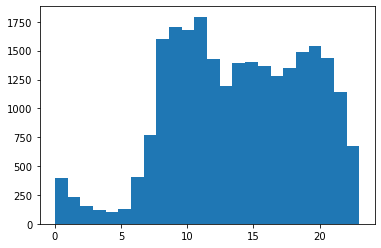

In [10]:
data_by_hour = data['TIME_HOUR']
bins = np.array(range(23))
plt.hist(data_by_hour, bins=24)

In [11]:
## top number of transactions by hour

In [12]:
data_by_hour = data[['transID','TIME_HOUR']].groupby(['TIME_HOUR']).count()
data_by_hour.nlargest(10,'transID')
display_side_by_side([data_by_hour.nlargest(10,'transID'),data_by_hour.nsmallest(10,'transID')],['Top 10','Bottom 10'])


,transID
TIME_HOUR,
11,1794
9,1701
10,1681
8,1597
20,1543
19,1485
21,1433
12,1429
15,1403


#### Sumary:
- Overall, most transactions are distributed from **8 am to 8 pm**. 
- The number of the transaction happened from **the 8 am to 11 am** (Morning working shift) account for **6,773** transactions (Top 4)
- **From 7 pm to 9 pm** (After working hour), there were **4,461** transactions 
- There only **1,534** transactions happened from **0 am to 8 am**

#### Insights:
- It should be noticed that customers have a higher tendency to use A Pay in **the morning working shift** or **after working hours**. Based on this behavior, we can boost the number of the transaction by **pushing notifications or booking (sliding) banners, floating icon** for more visibility during that period. **For example**, we can send notifications around **9 or 11 am** which have the highest and second-highest of transactions in the day. It is strongly believed that people have a higher tendency to check their phone during this time and they can see A Pay promotion program.


- On the other hand, people are not willing to use A Pay in other periods. A Pay can offer them a more attractive voucher that can be **limited used in specific hours**. For example, **"Night Owl" Telco voucher 20% cap 30k** that can be applied from 0 to 5 am. With this special voucher, we can raise the traffic for the A Pay app and reduce cannibalization. However, CPO should be carefully considered. 

#### To get more insights about the customer behavior according to transaction time. We can divide customers into 2 groups "new" and "old" customers.

In [13]:
data_new_by_hour = data[data['new Pay']==1].copy()
data_new_by_hour = data_new_by_hour[['transID','TIME_HOUR','new Pay']].groupby(['TIME_HOUR','new Pay']).count().sort_values(by=['transID'], ascending=False)
data_old_by_hour = data[data['new Pay']==0].copy()
data_old_by_hour = data_old_by_hour[['transID','TIME_HOUR','new Pay']].groupby(['TIME_HOUR','new Pay']).count().sort_values(by=['transID'], ascending=False)
display_side_by_side([data_new_by_hour, data_old_by_hour], ['New User','Old User'])


,,transID
TIME_HOUR,new Pay,
12,1,288
11,1,271
20,1,267
14,1,261
19,1,259
18,1,253
16,1,252
21,1,251
10,1,234


#### Sumary:
- The new user mostly made their first transaction from **11 am to 2 pm (break-time)** and **after working hours (from 6 pm to 8 pm)**
- There only **453** transactions happened from **0 am to 8 am**

#### Insights:
- It should be noticed that new customers have a **high tendency to make their first order during break time or working hours**. Based on these numbers, A Pay can focus on sending notifications for new users during this period, which can raise their awareness about the A Promotion program.


- Besides that, the number of new users is quite low compared to that of old users. If A Pay focuses on acquiring more customers. Some special scheme should be offered for this group. Specifically, there are only **2 kinds of VC** in this campaign **20 k** and **9k** which are not attracting new customers. For example, AirPay will give new users **100% VC coin cashback- CAP 50k**  when they buy their first digital product on Air Pay. A Pay should modify the promotion scheme for new users which can compete against other E-wallet.

### <font color='blue'>1.2) By Rebate amount and Mobile network carriers </font>

#### A Pay sponsored 9k or 20k for each transaction. Therefore, we can break down user into 2 segments: 9k VC and 20k VC

In [14]:
data_by_amount_carrier = data[['transID','userID','Giá trị khuyến mãi','telco']].groupby(['Giá trị khuyến mãi','telco'],sort = True).agg({"transID":"count","userID": "nunique"}).sort_values(by=['Giá trị khuyến mãi', 'transID'], ascending=False)
data_by_amount_carrier['Usage Ratio'] = data_by_amount_carrier['transID']/data_by_amount_carrier['userID']*1.00
data_by_amount_carrier

transID  userID  Usage Ratio
Giá trị khuyến mãi telco                                     
20000              VIETTEL           194     194         1.00
                   MOBIFONE           73      73         1.00
                   VINAPHONE          52      52         1.00
                   VIETNAMOBILE        7       7         1.00
9000               VIETTEL         13508    8829         1.53
                   MOBIFONE         6159    4264         1.44
                   VINAPHONE        3952    2745         1.44
                   VIETNAMOBILE      827     678         1.22
                   GMOBILE             8       8         1.00

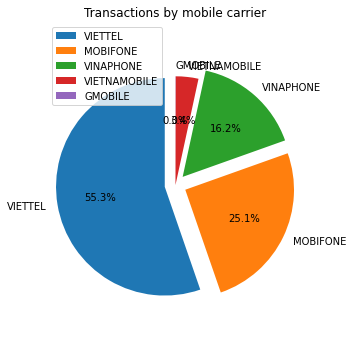

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data['telco'].unique().tolist()
data_by_carrier = data[['transID','userID','telco']].groupby(['telco'],sort = True).agg({"transID":"count","userID": "nunique"}).sort_values(by=['transID'], ascending=False)

sizes = data_by_carrier['transID']
explode = (0.1, 0.1, 0.1, 0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('Transactions by mobile carrier')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

#### Sumary:
- Most of the transactions applied **9k voucher (VC)**. Within these group, **Viettel account for the highest number of transactions (13,508), the following is Mobifone (6,159) and Vinaphone (3,952)**. However, it should be noticed that the usage ratio of these groups is about **1.5** which means sellers in this group have a higher intention to make more than 1 transaction. 
- While **20k VC** were used only **326 times** and the usage ratio is only 1. This could be because the number of 20k VC issued is significantly lower than that of 9k VC.  The number of Viettel users is also the highest.
- Most of the users are **Viettel** users which are accounted for **55% of total transactions**. Both **Vinaphone and Mobile** phone account for **41%**. 

#### Insights:
- Most users from Viettel, while the number of users from other mobile carriers is quite low. We can mare more analysis based on this point and find the reasons behind it. Some hypotheses can be tested:
    - 1) The number of A Pay user in the platform are mostly from Viettel carrier.
    - 2) The campaign happened on the same day that Viettel offered a promotion, meaning that users of Viettel carrier are more likely to use A Pay during this time -> that Hypothesis can be tested by checking the promotion day of mobile carrier
    

### <font color='red'>Measure overall performance of this campaign - Evaluate its cost effectiveness in terms of cost per users and cost acquisition user. </font>

In [16]:
print("There are",data["transID"].count(),"transactions were made by", data['userID'].nunique(),"users")
print("CPO:", round(data['Giá trị khuyến mãi'].sum()/data['transID'].count(),2))
print(data[data['new Pay'] == 1]['userID'].count(),"new users paid by A Pay for the first time")
print("CPO for new customer:",round(data[data['new Pay'] == 1]['Giá trị khuyến mãi'].sum()/data[data['new Pay'] == 1]['transID'].count()))

There are 24780 transactions were made by 15339 users
CPO: 9144.71
4243 new users paid by A Pay for the first time
CPO for new customer: 9443


#### Suggestion 
- A Pay needs to spend **9443 VND** to acquire 1 new user. The cost is not too high compared to the overall CPO. 
- However, the number of the new user only account for **28% of total user**. If the campaign focusing on acquiring new user and A want to increase more new users, A should revise the scheme or offering more attractive VC for new customers.